**Analyse exploratoire des données de consommation et d'émission des bâtiment non destinés à l'habitation dans la ville de Seattle.**

Source des données : [seattle data](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy/about_data)

# Import des packages et des données

Les librairies suivantes nous permettrons de manipuler convenablement les données dans des dataframes et des matrices et d'élaborer des affichages graphiques pour illustrer les résultats.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Les données sont téléchargées depuis google drive.

In [2]:
df_source=pd.read_csv('/content/drive/MyDrive/FORMATION DATASCIENTIST OC - Lucas GAMBA/Projet 4/Content/2016_Building_Energy_Benchmarking.csv',sep=',')
df=df_source.copy()

# pre-analysis

### Filtering residential properties

In [3]:
df_source.shape

(3376, 46)

Les données brutes ont 3376 lignes et 46 colonnes.

Ci-dessous nous avons la liste des colonnes et le type de données qu'elles contiennent (int64 et float64 pour les données numériques, bool pour les booléen et object pour les textulles).

In [4]:
df_source.dtypes.sort_values()

DefaultData                           bool
OSEBuildingID                        int64
DataYear                             int64
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
NumberofFloors                       int64
CouncilDistrictCode                  int64
YearBuilt                            int64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SourceEUI(kBtu/sf)                 float64
SiteEnergyUse(kBtu)                float64
ThirdLargestPropertyUseTypeGFA     float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
Electricity(kBtu)                  float64
NaturalGas(therms)                 float64
NaturalGas(kBtu)                   float64
Comments                           float64
SourceEUIWN(kBtu/sf)               float64
SecondLarge

In [5]:
df_source.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

L'objectif est de modéliser les consommations et émission des bâtiments non résidentiel. Donc nous filtrons ci-dessous via la variables BuildingType tout ce qui se réfère à du résidentiel.

In [6]:
# check of values in buildingType
df['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [7]:
# we only keep non-redidential building
df=df.loc[df['BuildingType'].isin(['Nonresidential WA','Nonresidential COS','NonResidential']),:]

In [8]:
df.shape

(1546, 46)

Nous avons désormais 1546 lignes dans nos données.

Nous pouvons rapidement voir le nombre de valeurs manquantes par variables :

In [18]:
(df.isna().mean()*df.shape[0]).sort_values()

OSEBuildingID                         0.0
PropertyGFABuilding(s)                0.0
PropertyGFAParking                    0.0
PropertyGFATotal                      0.0
NumberofFloors                        0.0
DefaultData                           0.0
YearBuilt                             0.0
Latitude                              0.0
Neighborhood                          0.0
CouncilDistrictCode                   0.0
Longitude                             0.0
ComplianceStatus                      0.0
TaxParcelIdentificationNumber         0.0
BuildingType                          0.0
PrimaryPropertyType                   0.0
PropertyName                          0.0
DataYear                              0.0
City                                  0.0
State                                 0.0
Address                               0.0
SourceEUIWN(kBtu/sf)                  2.0
NaturalGas(kBtu)                      2.0
NaturalGas(therms)                    2.0
Electricity(kBtu)                 

Text(0.5, 1.0, 'Number of missing values')

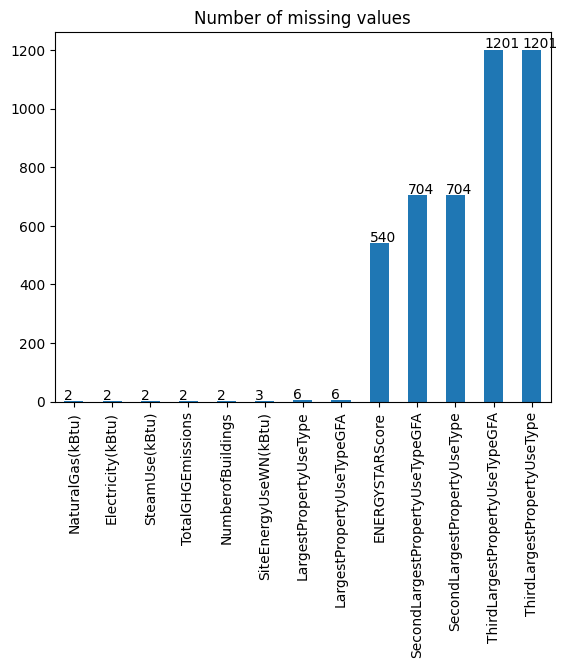

In [28]:
# liste et illustration graphique des colonnes dans lesquelles nous avons des valeurs manquantes
L = ['ENERGYSTARScore',
      'SecondLargestPropertyUseTypeGFA',
      'SecondLargestPropertyUseType',
      'ThirdLargestPropertyUseTypeGFA',
      'ThirdLargestPropertyUseType',
      'SiteEnergyUseWN(kBtu)',
      'LargestPropertyUseType',
      'LargestPropertyUseTypeGFA',
      'NaturalGas(kBtu)',
      'Electricity(kBtu)',
      'SteamUse(kBtu)',
      'TotalGHGEmissions',
      'NumberofBuildings']

D = (df[L].isna().mean()*df.shape[0])

D.sort_values().plot.bar()
plt.xticks(rotation = 90)
c=-1
for i in D.sort_values().index:
  c+=1
  plt.text(x= c-.25,y= D[i]+5,s= int(D[i]))

plt.title('Number of missing values')

Nous imputons par la médiane les quelques colonnes numériques listées ci-dessous au vue de le faibles nombre de valeurs manquantes :

In [40]:
L2 = ['NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)',
       'TotalGHGEmissions', 'NumberofBuildings', 'SiteEnergyUseWN(kBtu)',
       'LargestPropertyUseTypeGFA']

from sklearn.impute import SimpleImputer
A = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[L2])

df[L2] = pd.DataFrame(A, columns = L2, index = df.index)

Vérifions le nouvel état des valeurs manquantes :

Text(0.5, 1.0, 'Number of missing values')

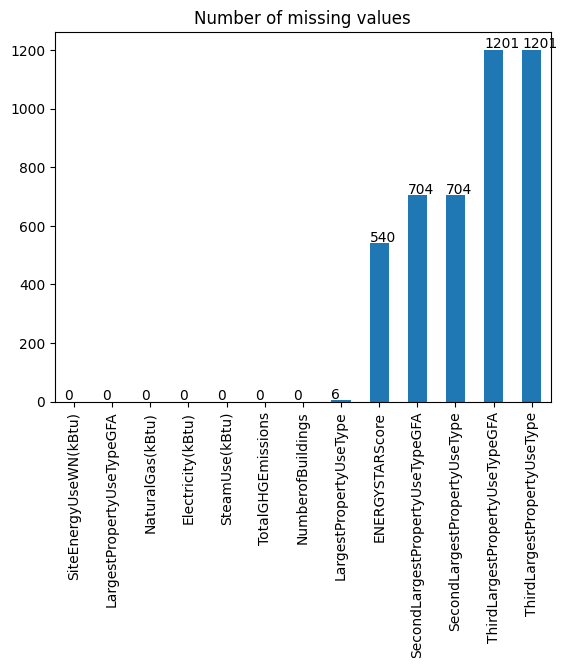

In [41]:
D = (df[L].isna().mean()*df.shape[0])

D.sort_values().plot.bar()
plt.xticks(rotation = 90)
c=-1
for i in D.sort_values().index:
  c+=1
  plt.text(x= c-.25,y= D[i]+5,s= int(D[i]))

plt.title('Number of missing values')

### GFA features

Il n'y a pas une mais plusieurs variables relatives aux surfaces pour chaque bâtiment. Dans cette section nous allons chercher quelles sont celles les plus pertinente pour nos futurs modèles.

#### Enumeration and correlation

Ci-desous la liste des colonnes contenant des surfaces et leur corrélation avec la première target à modéliser : SiteEnergyUseWN(kBtu)

<Axes: >

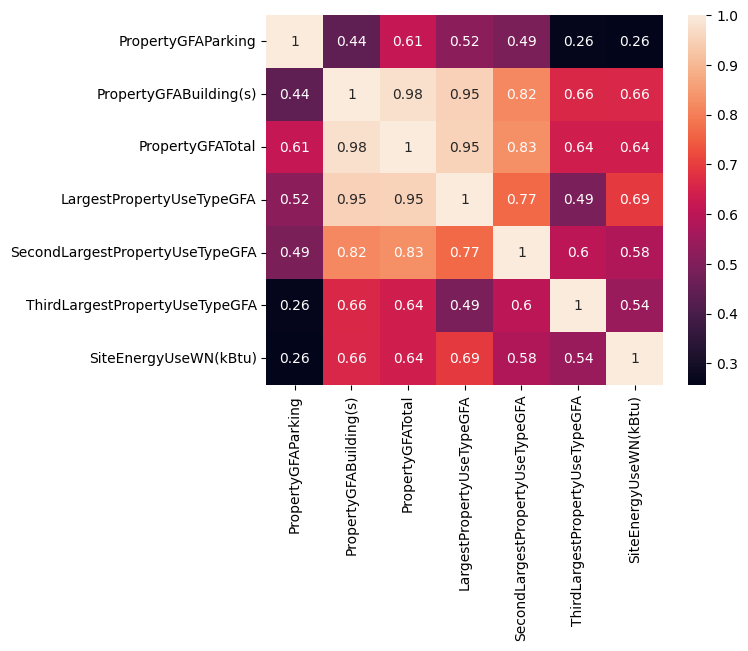

In [ ]:
gfa_feat = ['PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'PropertyGFATotal',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']
sns.heatmap(df[gfa_feat + ['SiteEnergyUseWN(kBtu)']].corr(), annot = True, fmt = '.2g')

A première vu, LargestPropertyType GFA et PropertyGFABuilding(s) sont les plus corrélées à notre cible. Nous allons creusé cette hypothèse.

In [ ]:
df[gfa_feat].describe()

,PropertyGFAParking,PropertyGFABuilding(s),PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
count,1546.000000,1.546000e+03,1.546000e+03,1.540000e+03,842.000000,345.000000
mean,13822.981889,9.798146e+04,1.118044e+05,9.044408e+04,35737.319830,13362.514199
std,43679.918511,1.682204e+05,1.915023e+05,1.561993e+05,66303.868836,27931.003780
min,0.000000,3.636000e+03,1.128500e+04,5.656000e+03,0.000000,0.000000
25%,0.000000,2.770000e+04,2.877000e+04,2.460000e+04,5325.000000,2635.000000
50%,0.000000,4.511350e+04,4.730250e+04,4.126550e+04,12000.000000,5775.000000
75%,0.000000,9.261400e+04,1.029090e+05,8.873100e+04,31269.250000,12349.000000
max,512608.000000,1.765970e+06,1.952220e+06,1.680937e+06,686750.000000,303910.000000


#### GFA and energy consumption

Grace à la l'homologue SiteEUIWN(kBtu/sf) par unité de surface de notre première target nous allons pouvoir déterminer quelles surfaces sont les pluls représentatives de la consommation des bâtiments.

Pour cela nous dressons plusieurs hypothèses de surfaces "consommatrices" que nous multiplions à la consommation par unité de surface. Plus la distribution du résultat obtenu sera proche de la distribution de notre target, plus cela signifiera que les surfaces utilisées dans le calcul sont celles qui seront pertinentes dans nos modèles.


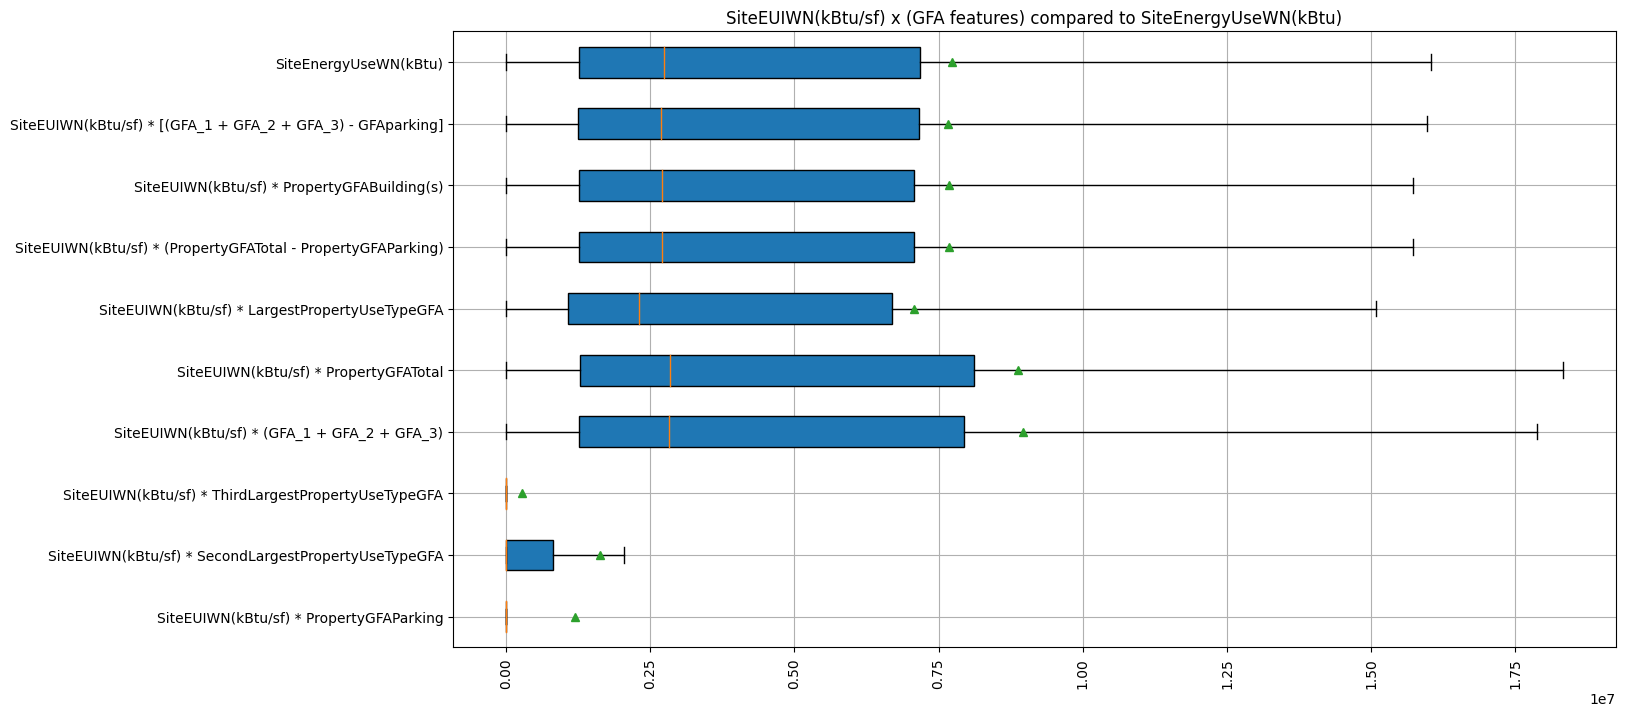

In [ ]:
# ploting products btw SiteEUIWN(kBtu/sf) and gfa features
# we check then distributions similar to SiteEnergyUseWN(kBtu)

df_bis=df.copy().fillna(0)
df_bis_park_0=df_bis.copy()

df_bis_park_0.loc[df_bis_park_0['LargestPropertyUseType']=='Parking','LargestPropertyUseTypeGFA']=0
df_bis_park_0.loc[df_bis_park_0['SecondLargestPropertyUseType']=='Parking','SecondLargestPropertyUseTypeGFA']=0
df_bis_park_0.loc[df_bis_park_0['ThirdLargestPropertyUseType']=='Parking','ThirdLargestPropertyUseTypeGFA']=0

list_gfa=[df_bis['PropertyGFAParking'],
          df_bis['SecondLargestPropertyUseTypeGFA'], df_bis['ThirdLargestPropertyUseTypeGFA'],
          df_bis['LargestPropertyUseTypeGFA'] + df_bis['SecondLargestPropertyUseTypeGFA'] + df_bis['ThirdLargestPropertyUseTypeGFA'],
          df_bis['PropertyGFATotal'], df_bis['LargestPropertyUseTypeGFA'],
          (df_bis['PropertyGFATotal'] - df_bis['PropertyGFAParking']),
          df_bis['PropertyGFABuilding(s)'],
          df_bis_park_0['LargestPropertyUseTypeGFA'] + df_bis_park_0['SecondLargestPropertyUseTypeGFA'] + df_bis_park_0['ThirdLargestPropertyUseTypeGFA']]

list_label=['PropertyGFAParking',
            'SecondLargestPropertyUseTypeGFA',
            'ThirdLargestPropertyUseTypeGFA',
            '(GFA_1 + GFA_2 + GFA_3)',
            'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
            '(PropertyGFATotal - PropertyGFAParking)', 'PropertyGFABuilding(s)',
            '[(GFA_1 + GFA_2 + GFA_3) - GFAparking]']

L = [df_bis['SiteEUIWN(kBtu/sf)']*list_gfa[g].fillna(0) for g in range(len(list_gfa))]
D = pd.concat(L + [df_bis['SiteEnergyUseWN(kBtu)'].fillna(0)],axis=1).dropna()

# plot de toutes les distributions
plt.figure(figsize=(15,8))

plt.boxplot(D, vert=False,
            labels=['SiteEUIWN(kBtu/sf) * ' + list_label[g] for g in range(len(list_gfa))] + ['SiteEnergyUseWN(kBtu)'],
            showmeans=True,
            showfliers=False,patch_artist=True)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('SiteEUIWN(kBtu/sf) x (GFA features) compared to SiteEnergyUseWN(kBtu)')
plt.show()

On remarque que la distribution de PropertyGFABuilding(s) et de la somme des (LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA) moins la surface des parking sembles similaire à celle de notre target. Nous allons vérifier cela avec un histogramme.

**SiteEUIWN(kBtu/sf) x (GFA_1 + GFA_2 + GFA_3 - GFA_parking) compared to SiteEnergyUseWN(kBtu) :**

---



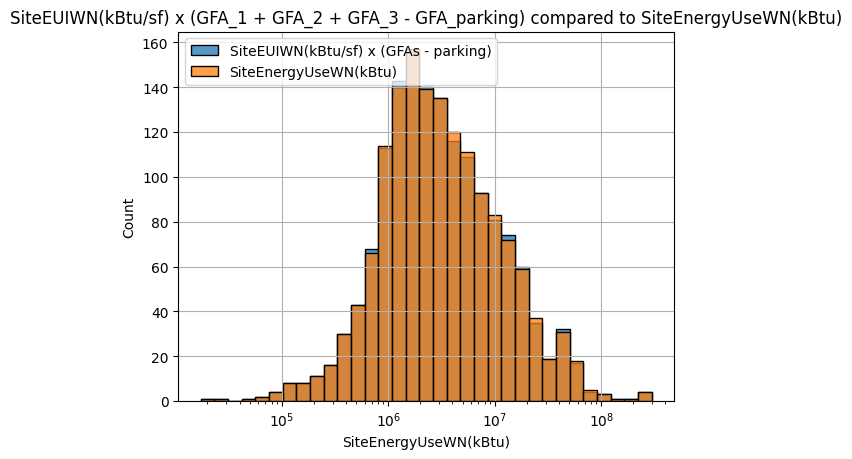

In [ ]:
D_park_0 = df_bis_park_0['LargestPropertyUseTypeGFA'] + df_bis_park_0['SecondLargestPropertyUseTypeGFA'] + df_bis_park_0['ThirdLargestPropertyUseTypeGFA']

plt.figure()
plt.grid(True)
sns.histplot(df_bis['SiteEUIWN(kBtu/sf)']*D_park_0, log_scale=True)
sns.histplot(df_bis['SiteEnergyUseWN(kBtu)'], log_scale=True)
plt.title('SiteEUIWN(kBtu/sf) x (GFA_1 + GFA_2 + GFA_3 - GFA_parking) compared to SiteEnergyUseWN(kBtu)')
plt.legend(['SiteEUIWN(kBtu/sf) x (GFAs - parking)', 'SiteEnergyUseWN(kBtu)'],
           loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# RMSE
E = (df_bis['SiteEUIWN(kBtu/sf)']*D_park_0)
F = df_bis['SiteEnergyUseWN(kBtu)']

print(f"RMSE = {np.sqrt(mean_squared_error(E, F))}")

RMSE = 613575.9665595265


Les distributions sont effectivement très proches ! nous allons comparer le score RMSE avec la même opération faite avec le PropertyGFABuilding.

**SiteEUIWN(kBtu/sf) x (PropertyGFABuilding(s)) compared to SiteEnergyUseWN(kBtu) :**

---





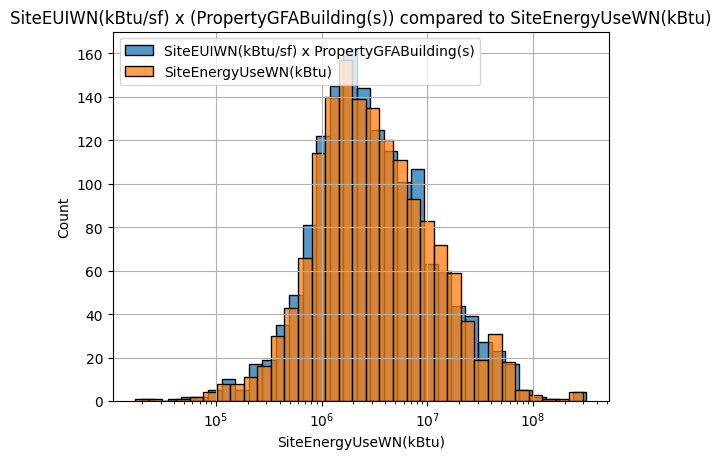

In [ ]:
plt.figure()
plt.grid(True)
sns.histplot(df_bis['SiteEUIWN(kBtu/sf)']*df_bis['PropertyGFABuilding(s)'], log_scale=True)
sns.histplot(df_bis['SiteEnergyUseWN(kBtu)'], log_scale=True)
plt.title('SiteEUIWN(kBtu/sf) x (PropertyGFABuilding(s)) compared to SiteEnergyUseWN(kBtu)')
plt.legend(['SiteEUIWN(kBtu/sf) x PropertyGFABuilding(s)', 'SiteEnergyUseWN(kBtu)'],
           loc='upper left')
plt.show()

In [ ]:
# RMSE
print(f"RMSE = {np.sqrt(mean_squared_error((df_bis['SiteEUIWN(kBtu/sf)']*df_bis['PropertyGFABuilding(s)']),df_bis['SiteEnergyUseWN(kBtu)']))}")

RMSE = 3941588.57389344


Les distributions sont également très similaires mais moins qu'avec la variables précedente.

**SiteEUIWN(kBtu/sf) x (PropertyGFATotal) compared to SiteEnergyUseWN(kBtu) :**

---



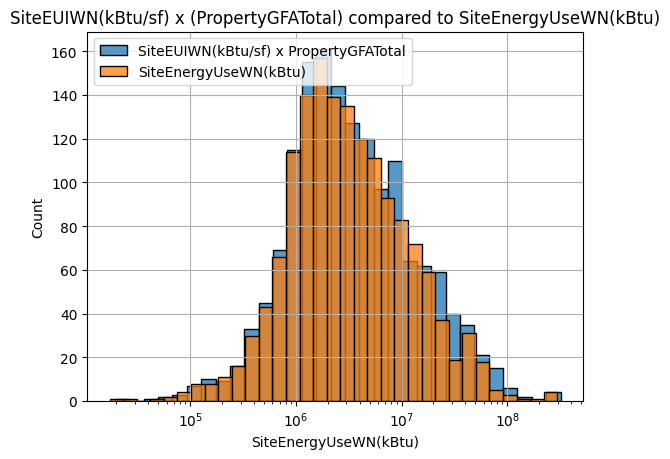

In [ ]:
plt.figure()
plt.grid(True)
sns.histplot(df_bis['SiteEUIWN(kBtu/sf)']*df_bis['PropertyGFATotal'], log_scale=True)
sns.histplot(df_bis['SiteEnergyUseWN(kBtu)'], log_scale=True)
plt.title('SiteEUIWN(kBtu/sf) x (PropertyGFATotal) compared to SiteEnergyUseWN(kBtu)')
plt.legend(['SiteEUIWN(kBtu/sf) x PropertyGFATotal', 'SiteEnergyUseWN(kBtu)'],
           loc='upper left')
plt.show()

In [ ]:
# RMSE
print(f"RMSE = {np.sqrt(mean_squared_error((df_bis['SiteEUIWN(kBtu/sf)']*df_bis['PropertyGFATotal']),df_bis['SiteEnergyUseWN(kBtu)']))}")

RMSE = 5818068.783188839


En revanche la surface totale de propriété commence à séloigner de la distribution attendue. Nous n'allons pas retenir cette variable.

We could keep in mind that (GFA_1 + GFA_2 + GFA_3 - GFA_parking) correspond the most to the consumption GFA.

Let's apply these operation on the GFA use type :

Ainsi, la somme des surfaces par type d'usage à laquelle on soustrait la surface de parking est la plus intéressante, nous allons appliquer cette opération à chaque colonnes de surfaces par type d'usage (c'est-à-dire que nous remplaçons par zéron toutes les surfaces de type "parking" dans ces colonnes).

In [ ]:

df_bis['LargestPropertyUseTypeGFA'] = df_bis_park_0['LargestPropertyUseTypeGFA']
df_bis['SecondLargestPropertyUseTypeGFA'] = df_bis_park_0['SecondLargestPropertyUseTypeGFA']
df_bis['ThirdLargestPropertyUseTypeGFA'] = df_bis_park_0['ThirdLargestPropertyUseTypeGFA']


Nous garderons également la surface du bâtiment (PropertyGFABuilding(s)) qui est intéressante car très corrélées à la target.

#### Exploring GFA use feature

Notons tout de même qu'il y a de légers écarts entre les colonnes de surfaces entres elles.

Cela ne sera à priori pas un problème dans un premier temps.

In [ ]:
# explorer la somme des GFA use - df des parking
parking_sum = np.sum([df.loc[df['LargestPropertyUseType']=='Parking','LargestPropertyUseTypeGFA'].sum(),
        df.loc[df['SecondLargestPropertyUseType']=='Parking','SecondLargestPropertyUseTypeGFA'].sum(),
        df.loc[df['ThirdLargestPropertyUseType']=='Parking','ThirdLargestPropertyUseTypeGFA'].sum()])
# A = sum GFA use - gfa parking
A = (df_bis['LargestPropertyUseTypeGFA'] + df_bis['SecondLargestPropertyUseTypeGFA'] + df_bis['ThirdLargestPropertyUseTypeGFA']).sum()-parking_sum
# B = GFA Building
B = df_bis['PropertyGFABuilding(s)'].sum()
print(f'PropertyGFABuilding(s) sum and (GFA sum - GFA parking) are similar about {round((np.abs(A - B)/B)*100, 2)} %')

PropertyGFABuilding(s) sum and (GFA sum - GFA parking) are similar about 16.5 %


In [ ]:
# sum of use GFA type
C = (df_bis['LargestPropertyUseTypeGFA'] + df_bis['SecondLargestPropertyUseTypeGFA'] + df_bis['ThirdLargestPropertyUseTypeGFA']).sum()
# B = GFA Total
D = df_bis['PropertyGFATotal'].sum()

print(f'PropertyGFATotal sum and GFAs sum are similar about {round((np.abs(C - D)/D)*100, 2)} %')

PropertyGFATotal sum and GFAs sum are similar about 13.08 %


### Energy features

#### Energy comparison

Comparons maintenant les colonnes de consommations d'énergie.


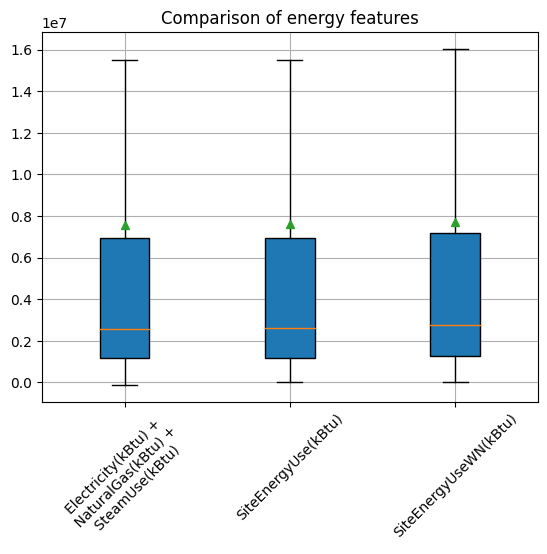

In [ ]:
dfEsum = df_bis['Electricity(kBtu)'] + df_bis['NaturalGas(kBtu)'] + df_bis['SteamUse(kBtu)']

L = [dfEsum, df_bis[['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]]
D = pd.concat(L ,axis=1).dropna()

labels = ['Electricity(kBtu) +\n NaturalGas(kBtu) +\n SteamUse(kBtu)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']

plt.figure()
plt.boxplot(D, labels=labels, showmeans=True, showfliers=False,patch_artist=True)
plt.xticks(rotation=45)
plt.title('Comparison of energy features')
plt.grid()

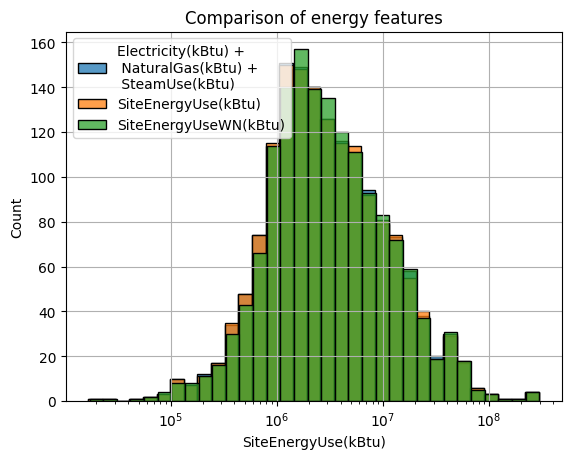

In [ ]:
[dfEsum, df_bis[['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]]

plt.figure()
plt.grid(True)
sns.histplot(dfEsum, log_scale=True)
sns.histplot(df_bis['SiteEnergyUse(kBtu)'], log_scale=True)
sns.histplot(df_bis['SiteEnergyUseWN(kBtu)'], log_scale=True)
plt.title('Comparison of energy features')
plt.legend(labels,
           loc='upper left')
plt.show()

In [ ]:
# RMSE sum energy and SiteEUI
print(f"RMSE = {np.sqrt(mean_squared_error(dfEsum, df_bis['SiteEnergyUse(kBtu)']))}",
      f"(sum1 - sum2) / sum1 : {((dfEsum - df_bis['SiteEnergyUse(kBtu)']).sum() / dfEsum.sum())*100} %")

RMSE = 859706.6655863118 (sum1 - sum2) / sum1 : -0.6672678131511258 %


In [ ]:
# RMSE sum energy and SiteEUIWN
print(f"RMSE = {np.sqrt(mean_squared_error(dfEsum, df_bis['SiteEnergyUseWN(kBtu)']))}",
       f"(sum1 - sum2) / sum1 : {((dfEsum - df_bis['SiteEnergyUseWN(kBtu)']).sum() / dfEsum.sum())*100} %")

RMSE = 1525718.8835025295 (sum1 - sum2) / sum1 : -2.0188174859865455 %


On note que la somme des consommations des trois types d'énergie (électricité, gaz et vapeur) sont bien comparables à notre target.

Par ailleurs, la target sera bien la variable Weather Normalized car comme son nom l'indique cette dernière est décorrélé de la météo de la région ce qui est préférable pour réaliser des prédictions.

#### Energy / sf comparison

Comparons aussi leurs homologues par unité de surface :

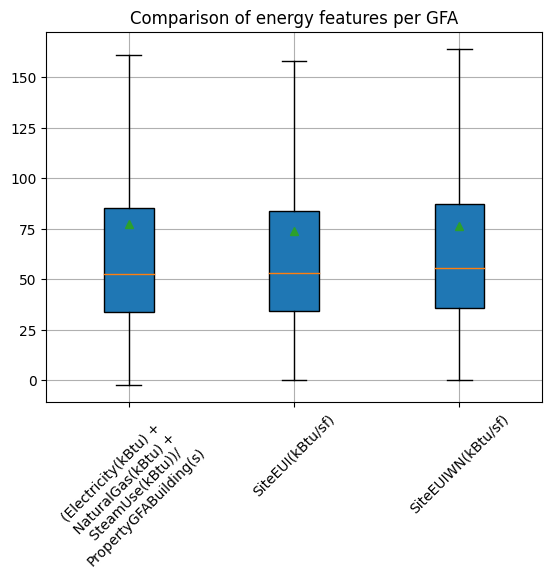

In [ ]:
dfEsum = (df_bis['Electricity(kBtu)'] + df_bis['NaturalGas(kBtu)'] + df_bis['SteamUse(kBtu)']) / df_bis['PropertyGFABuilding(s)']

L = [dfEsum, df_bis[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']]]
D = pd.concat(L ,axis=1).dropna()

labels = ['(Electricity(kBtu) +\n NaturalGas(kBtu) +\n SteamUse(kBtu))/\nPropertyGFABuilding(s)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']

plt.figure()
plt.boxplot(D, labels=labels, showmeans=True, showfliers=False,patch_artist=True)
plt.xticks(rotation=45)
plt.title('Comparison of energy features per GFA')
plt.grid()

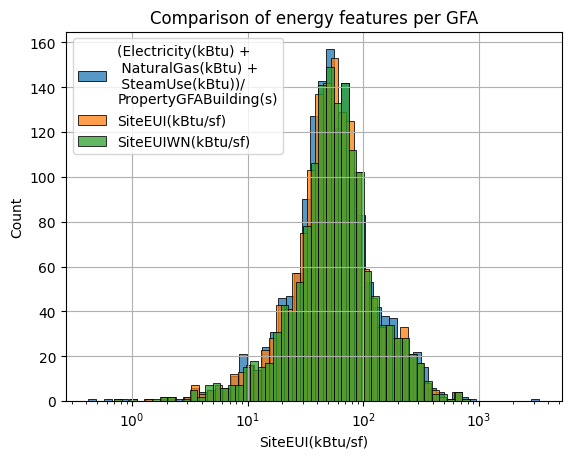

In [ ]:
[dfEsum, df_bis[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']]]

plt.figure()
plt.grid(True)
sns.histplot(dfEsum, log_scale=True)
sns.histplot(df_bis['SiteEUI(kBtu/sf)'], log_scale=True)
sns.histplot(df_bis['SiteEUIWN(kBtu/sf)'], log_scale=True)
plt.title('Comparison of energy features per GFA')
plt.legend(labels,
           loc='upper left')
plt.show()

In [ ]:
# RMSE sum energy and SiteEUI
print(f"RMSE = {np.sqrt(mean_squared_error(dfEsum, df_bis['SiteEUI(kBtu/sf)']))}",
      f"(sum1 - sum2) / sum1 : {((dfEsum - df_bis['SiteEUI(kBtu/sf)']).sum() / dfEsum.sum())*100} %")

RMSE = 80.4633694435137 (sum1 - sum2) / sum1 : 4.210006670063621 %


In [ ]:
# RMSE sum energy and SiteEUIWN
print(f"RMSE = {np.sqrt(mean_squared_error(dfEsum, df_bis['SiteEUIWN(kBtu/sf)']))}",
       f"(sum1 - sum2) / sum1 : {((dfEsum - df_bis['SiteEUIWN(kBtu/sf)']).sum() / dfEsum.sum())*100} %")

RMSE = 80.22401518773862 (sum1 - sum2) / sum1 : 1.1354357914512172 %


La conclusion est la même qu'à la section précédente.

### SourceEUI

Examinons rapidement la varible source d'énergie.

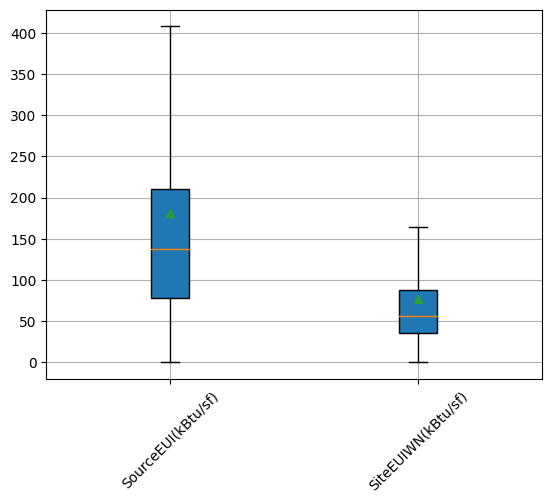

In [ ]:
df_conso_=pd.concat([df_bis['SourceEUI(kBtu/sf)'], df_bis['SiteEUIWN(kBtu/sf)']],axis=1)

plt.figure()
plt.boxplot(df_conso_, labels=df_conso_.columns, showmeans=True, showfliers=False,patch_artist=True)
plt.xticks(rotation=45)
plt.grid()

Sans grande surprise celle-ci est beaucoup plus grande que notre target car elle comprend notamment la génération et la transmission d'énergie. Nous ne l'incluerons pas dans nos modèles, d'autant plus que l'objectif est de s'en passer.

### Other features

Analyse brève des colonnes DefaultData, Comments, ComplianceStatus et Outlier.

In [ ]:
df_others=df[['DefaultData', 'ComplianceStatus', 'Outlier']]

In [ ]:
df_others.describe()

,DefaultData,ComplianceStatus,Outlier
count,1546,1546,16
unique,2,4,2
top,False,Compliant,Low outlier
freq,1533,1514,14


##### Outliers

In [ ]:
df.loc[df["Outlier"].isna()==False,['SiteEUI(kBtu/sf)',"Outlier"]].sort_values('SiteEUI(kBtu/sf)')

,SiteEUI(kBtu/sf),Outlier
2189,0.700000,Low outlier
1229,1.000000,Low outlier
1295,1.800000,Low outlier
3152,1.800000,Low outlier
2450,3.400000,Low outlier
1045,3.600000,Low outlier
1611,4.200000,Low outlier
384,4.600000,Low outlier
2801,5.200000,Low outlier
1945,6.300000,Low outlier


##### ComplianceStatus & DeafaultData

In [ ]:
df["ComplianceStatus"].unique()

array(['Compliant', 'Non-Compliant', 'Error - Correct Default Data',
       'Missing Data'], dtype=object)

In [ ]:
df["DefaultData"].unique()

array([False,  True])

In [ ]:
df.loc[(df["ComplianceStatus"]!='Compliant') & (df["SiteEUI(kBtu/sf)"].isnull()==False) & (df["SiteEUI(kBtu/sf)"]!=0),['SiteEUI(kBtu/sf)',"ComplianceStatus",'Outlier','DefaultData']].sort_values('SiteEUI(kBtu/sf)')

,SiteEUI(kBtu/sf),ComplianceStatus,Outlier,DefaultData
2189,0.700000,Non-Compliant,Low outlier,False
1229,1.000000,Non-Compliant,Low outlier,False
3152,1.800000,Non-Compliant,Low outlier,False
1295,1.800000,Non-Compliant,Low outlier,False
2450,3.400000,Non-Compliant,Low outlier,False
1045,3.600000,Error - Correct Default Data,Low outlier,True
1611,4.200000,Non-Compliant,Low outlier,False
384,4.600000,Non-Compliant,Low outlier,False
2801,5.200000,Non-Compliant,Low outlier,False
1945,6.300000,Non-Compliant,Low outlier,False


In [ ]:
df.loc[df["DefaultData"]==True,['SiteEUI(kBtu/sf)',"ComplianceStatus",'Outlier','DefaultData']].sort_values('SiteEUI(kBtu/sf)')

,SiteEUI(kBtu/sf),ComplianceStatus,Outlier,DefaultData
1045,3.600000,Error - Correct Default Data,Low outlier,True
1466,11.600000,Error - Correct Default Data,NaN,True
1641,13.400000,Error - Correct Default Data,NaN,True
3369,25.200001,Error - Correct Default Data,NaN,True
1467,31.799999,Error - Correct Default Data,NaN,True
1977,36.200001,Error - Correct Default Data,NaN,True
3366,36.799999,Error - Correct Default Data,NaN,True
2682,38.599998,Error - Correct Default Data,NaN,True
2076,42.099998,Error - Correct Default Data,NaN,True
1656,45.700001,Error - Correct Default Data,NaN,True


In [ ]:
df.loc[df["ComplianceStatus"]!='Compliant',['SiteEUI(kBtu/sf)',"ComplianceStatus",'Outlier','DefaultData']].sort_values('SiteEUI(kBtu/sf)')

,SiteEUI(kBtu/sf),ComplianceStatus,Outlier,DefaultData
746,0.000000,Missing Data,NaN,False
2189,0.700000,Non-Compliant,Low outlier,False
1229,1.000000,Non-Compliant,Low outlier,False
3152,1.800000,Non-Compliant,Low outlier,False
1295,1.800000,Non-Compliant,Low outlier,False
2450,3.400000,Non-Compliant,Low outlier,False
1045,3.600000,Error - Correct Default Data,Low outlier,True
1611,4.200000,Non-Compliant,Low outlier,False
384,4.600000,Non-Compliant,Low outlier,False
2801,5.200000,Non-Compliant,Low outlier,False


In [ ]:
# check if all null (0) values are common to Low outlier
D=df.loc[df["SiteEUI(kBtu/sf)"]==0,['Outlier','ComplianceStatus']]
display(D['Outlier'].unique(),D['ComplianceStatus'].unique())

array([nan], dtype=object)

array(['Missing Data'], dtype=object)

For DefaultData = True we have ComplianceStatus = Error - Correct Default Data et Outliers = {nan, Low outlier}.

Every ComplianceStatus = Non-compliant => Outlier = {Low, High}

Every ComplianceStatus = Missing data => consumption = 0

It seems that these features could help for filtering bad data in our dataframe. We will compare the filtered data from these variables with an other method.

## Outliers analysis

Dans cette partie nous examinons la possibilité d'éliminer les valeurs abérrantes dans nos données.

#### Null and negative values

Pour commencer, nous pouvons combler les valeurs égales à zéro dans la colonne target lorsqu'il y a des valeurs non nulles dans les autres colonnes d'énergie (étant donnée que la sonnes des autres colonnes d'énergie est égale à la consommation du bâtiment).

In [ ]:
# copy of df before treatment
df_bis_out = df_bis.copy()

Examinons ces zéros :

In [ ]:
df_bis_out.loc[df_bis_out['SiteEnergyUseWN(kBtu)']<=0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu)
220,13985064.0,0.0,10921066.00,0.0
247,26602310.0,220905.0,0.00,0.0
284,2596546.0,0.0,2850077.75,0.0
304,0.0,0.0,0.00,0.0
350,3484915.0,0.0,0.00,0.0
563,4871126.0,1416041.0,0.00,0.0
578,0.0,0.0,0.00,0.0
746,0.0,0.0,0.00,0.0
882,167075.0,329402.0,0.00,0.0
953,710478.0,417701.0,0.00,0.0


Remplaçons les par les sommes des énergies :

In [ ]:
df_bis_out.loc[df_bis_out['SiteEnergyUseWN(kBtu)']<=0,  'SiteEnergyUseWN(kBtu)'] = df_bis_out.loc[df_bis_out['SiteEnergyUseWN(kBtu)']<=0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']].sum(axis=1)

Vérifions le remplacement :

In [ ]:
df_bis_out.loc[df_bis_out['SiteEnergyUseWN(kBtu)']<=0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu)
304,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0
2670,0.0,0.0,0.0,0.0


Puis supprimons les valeurs nulles restants comme elles ne sont que quatre.

In [ ]:
df_bis_out = df_bis_out.loc[df_bis_out['SiteEnergyUseWN(kBtu)']> 0, :]

Nous avons une unique valeur négative dans la colonne d'électicité que nous pouvons supprimer.

In [ ]:
df_bis_out[['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUseWN(kBtu)']][df_bis_out['Electricity(kBtu)']<=0]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu)
426,0.0,11508035.0,0.0,1.185445e+07
513,0.0,0.0,0.0,1.284386e+07
3206,-115417.0,0.0,0.0,2.401321e+05


In [ ]:
df_bis_out = df_bis_out.loc[df_bis_out['Electricity(kBtu)']>0, :]

Vérifions qu'il ne reste plus de zéro :

In [ ]:
df_bis_out.loc[(df_bis_out['Electricity(kBtu)']==0) & (df_bis_out['NaturalGas(kBtu)']==0) & (df_bis_out['SteamUse(kBtu)']==0), ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu)


#### Energy and target

Dans cette section et les deux suivante avaient été codées des fonctions permettant de filtrer les valeurs très élevées dans les données.

Cependant, à moins de filtrer sur un seuil faible à 5 ou 6 écartypes des valeurs moyennes ou 4 ou 5 fois l'écart inter-quartile) cela supprime entre 150 et 300 lignes dans le dataframe ce qui diminu grandement les performances des modèles.

Néanmoins ces sections ont été laissés dans ce notebook mais ne sont pas exploitées.

In [ ]:
# function which return a new df without outlier in a given range based on interquartile
def outlier_suppression_iq(dataframe, feature, IQ_rg):

  q1, q3 = np.quantile(dataframe[feature], [.25, .75])
  delta = IQ_rg * (q3 - q1)

  dataframe = dataframe.loc[(dataframe[feature] >= q1 - delta) & (dataframe[feature] <= q3 + delta), :]

  return dataframe

In [ ]:
# function which return a new df without outlier in a given range based on standard deviation
def outlier_suppression_std(dataframe, feature, std_rg):

  std, mean = dataframe[feature].std(), dataframe[feature].mean()
  delta = std_rg * std

  dataframe = dataframe.loc[(dataframe[feature] >= mean - delta) & (dataframe[feature] <= mean + delta), :]

  return dataframe

In [ ]:
# transformer IQ
def transform_iq(list_feat_, coef_supp, df_bis_out_cop_):
  for f in list_feat_:
    df_bis_out_cop_ = outlier_suppression_iq(df_bis_out_cop_, f, coef_supp)

  plt.figure()
  plt.boxplot(df_bis_out_cop_[list_feat_], labels=list_feat_, showmeans=True, showfliers=True,patch_artist=True)
  plt.xticks(rotation=45)
  plt.title(f"{str(list_feat_)}\n outlier suppresion at {coef_supp} IQ")
  plt.grid()

  return df_bis_out_cop_

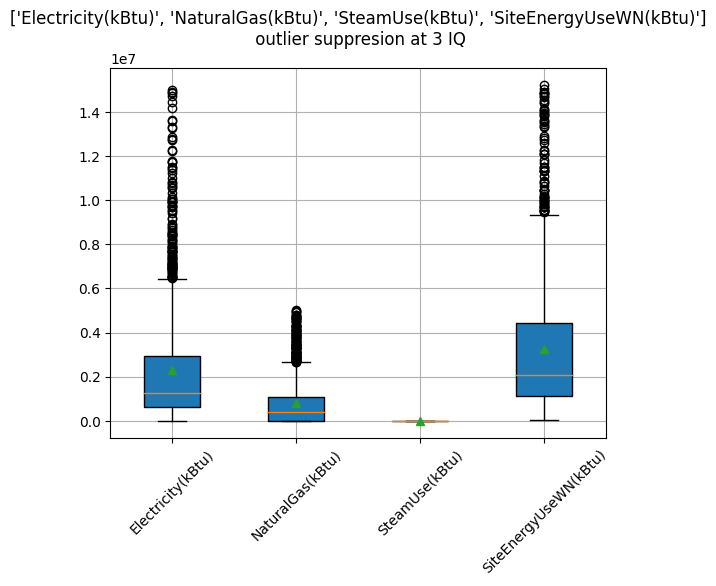

In [ ]:
df_bis_out_cop_1 = df_bis_out.copy()
list_feat_1 = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUseWN(kBtu)']
coef_supp = 3

df_bis_out_cop_1 = transform_iq(list_feat_1, coef_supp, df_bis_out_cop_1)

In [ ]:
df_bis_out_cop_1.shape, df_bis_out_cop_1['SteamUse(kBtu)'].describe()

((1247, 46),
 count    1247.0
 mean        0.0
 std         0.0
 min         0.0
 25%         0.0
 50%         0.0
 75%         0.0
 max         0.0
 Name: SteamUse(kBtu), dtype: float64)

SteamUse(kBtu) is completely suppressed after IQ treatment but as we will transform these features in ratio this is not a problem.

In [ ]:
# transformer std
def transform_std(list_feat_, coef_supp, df_bis_out_cop_):
  for f in list_feat_:
    df_bis_out_cop_ = outlier_suppression_std(df_bis_out_cop_, f, coef_supp)

  plt.figure()
  plt.boxplot(df_bis_out_cop_[list_feat_], labels=list_feat_, showmeans=True, showfliers=True,patch_artist=True)
  plt.xticks(rotation=45)
  plt.title(f"{list_feat_} \noutlier suppresion at {coef_supp} std")
  plt.grid()

  return df_bis_out_cop_

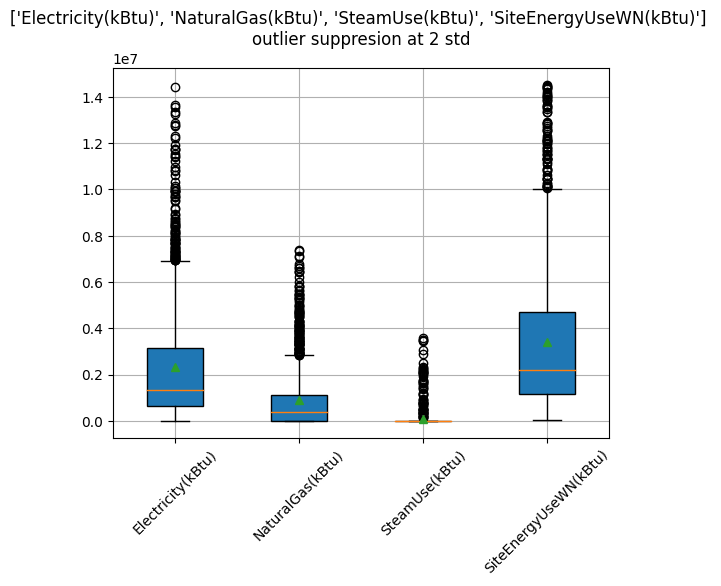

In [ ]:
df_bis_out_cop_2 = df_bis_out.copy()
coef_supp = 2

df_bis_out_cop_2 = transform_std(list_feat_1, coef_supp, df_bis_out_cop_2)

In [ ]:
df_bis_out_cop_2.shape, df_bis_out_cop_2['SteamUse(kBtu)'].describe()

((1329, 46),
 count    1.329000e+03
 mean     6.137167e+04
 std      3.456757e+05
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      0.000000e+00
 max      3.578548e+06
 Name: SteamUse(kBtu), dtype: float64)

#### GFA Uses and GFA building

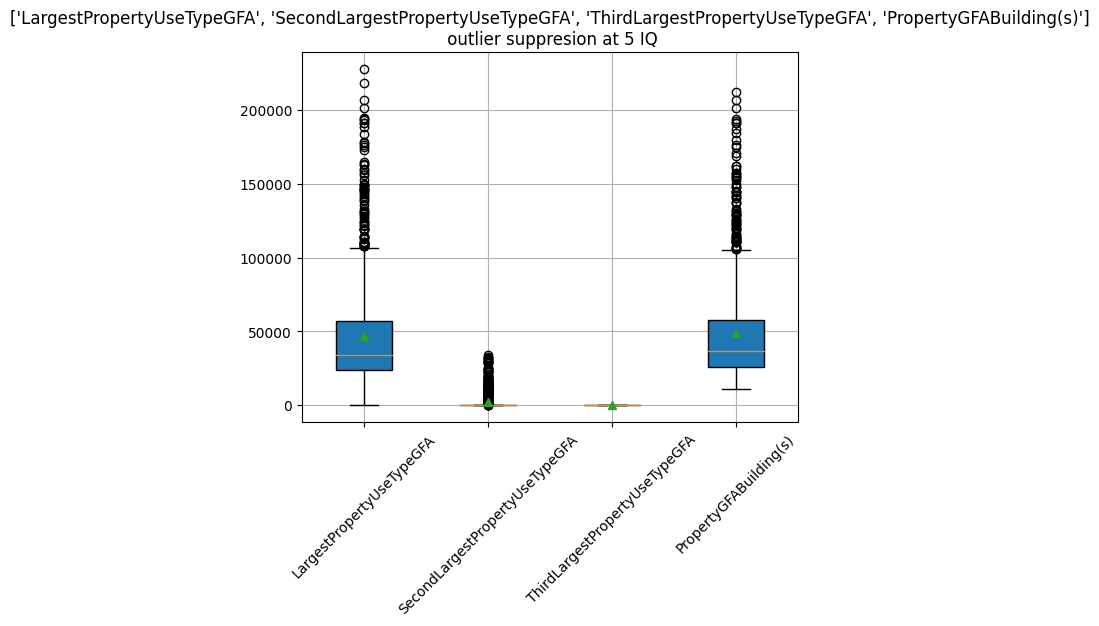

In [ ]:
# IQ filter
df_bis_out_cop_12 = df_bis_out_cop_1.copy()
list_feat_2 = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)']
coef_supp = 5

df_bis_out_cop_12 = transform_iq(list_feat_2, coef_supp, df_bis_out_cop_12)

In [ ]:
df_bis_out_cop_12.shape, df_bis_out_cop_12['ThirdLargestPropertyUseTypeGFA'].describe()

((1014, 46),
 count    1014.0
 mean        0.0
 std         0.0
 min         0.0
 25%         0.0
 50%         0.0
 75%         0.0
 max         0.0
 Name: ThirdLargestPropertyUseTypeGFA, dtype: float64)

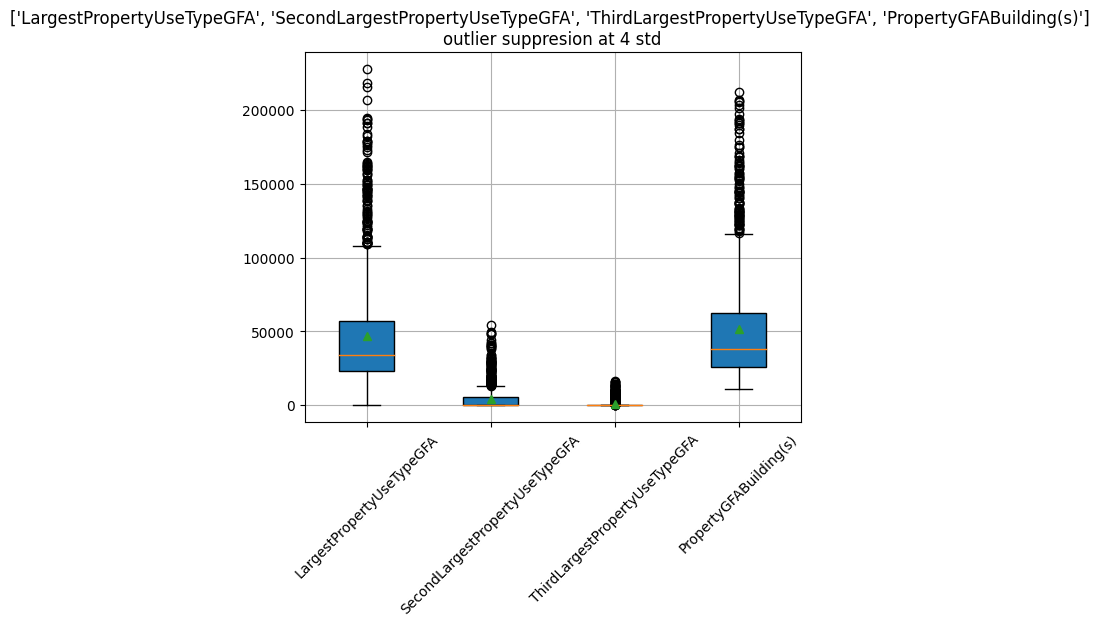

In [ ]:
# std filter
df_bis_out_cop_22 = df_bis_out_cop_2.copy()
coef_supp = 4

df_bis_out_cop_22 = transform_std(list_feat_2, coef_supp, df_bis_out_cop_2)

In [ ]:
df_bis_out_cop_22.shape, df_bis_out_cop_22['ThirdLargestPropertyUseTypeGFA'].describe()

((1285, 46),
 count     1285.000000
 mean       816.033697
 std       2415.384385
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max      16128.000000
 Name: ThirdLargestPropertyUseTypeGFA, dtype: float64)

#### Years, floors and building number

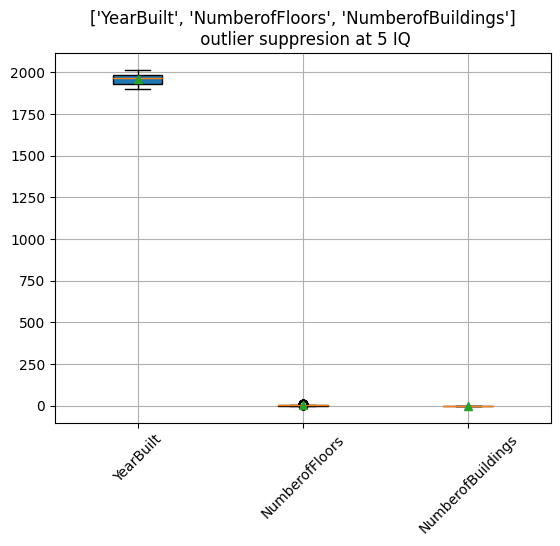

In [ ]:
# IQ filter
df_bis_out_cop_123 = df_bis_out_cop_12.copy()
list_feat_3 = ['YearBuilt', 'NumberofFloors','NumberofBuildings']
coef_supp = 5

df_bis_out_cop_123 = transform_iq(list_feat_3, coef_supp, df_bis_out_cop_123)

In [ ]:
df_bis_out_cop_123.shape, df_bis_out_cop_123['ThirdLargestPropertyUseTypeGFA'].describe()

((956, 46),
 count    956.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: ThirdLargestPropertyUseTypeGFA, dtype: float64)

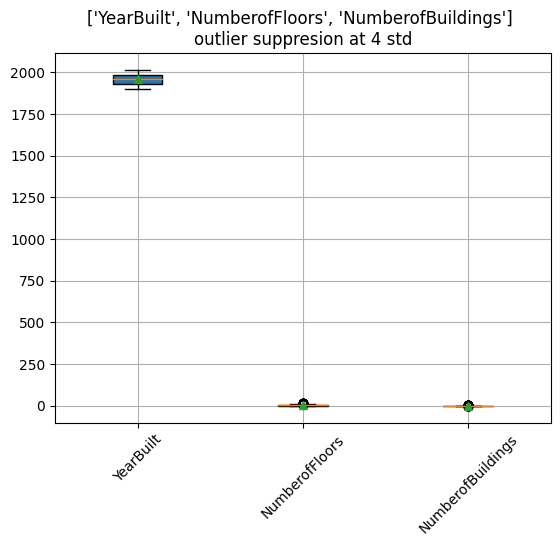

In [ ]:
# std filter
df_bis_out_cop_223 = df_bis_out_cop_22.copy()
coef_supp = 4

df_bis_out_cop_223 = transform_std(list_feat_3, coef_supp, df_bis_out_cop_223)

In [ ]:
df_bis_out_cop_223.shape, df_bis_out_cop_223[list_feat_3].describe()

((1267, 46),
          YearBuilt  NumberofFloors  NumberofBuildings
 count  1267.000000     1267.000000        1267.000000
 mean   1957.532755        2.813733           0.978690
 std      32.565445        2.209065           0.207339
 min    1900.000000        0.000000           0.000000
 25%    1927.000000        1.000000           1.000000
 50%    1962.000000        2.000000           1.000000
 75%    1983.000000        4.000000           1.000000
 max    2015.000000       17.000000           2.000000)

In [ ]:
df_bis_out_cop_223[list_feat_1 + list_feat_2 + list_feat_3].describe()

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s),YearBuilt,NumberofFloors,NumberofBuildings
count,1.267000e+03,1.267000e+03,1.267000e+03,1.267000e+03,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,2.128624e+06,8.684461e+05,6.437486e+04,3.187675e+06,46592.974743,3895.533228,813.469850,51467.659037,1957.532755,2.813733,0.978690
std,2.255023e+06,1.271100e+06,3.537655e+05,2.936664e+06,36405.779181,7743.171708,2417.596553,36865.085654,32.565445,2.209065,0.207339
min,6.138000e+03,0.000000e+00,0.000000e+00,1.726000e+04,0.000000,0.000000,0.000000,10925.000000,1900.000000,0.000000,0.000000
25%,6.014995e+05,0.000000e+00,0.000000e+00,1.120115e+06,22929.000000,0.000000,0.000000,25920.000000,1927.000000,1.000000,1.000000
50%,1.259195e+06,3.812050e+05,0.000000e+00,2.095175e+06,33647.000000,0.000000,0.000000,38000.000000,1962.000000,2.000000,1.000000
75%,2.852646e+06,1.097461e+06,0.000000e+00,4.399047e+06,56759.500000,5350.000000,0.000000,61760.500000,1983.000000,4.000000,1.000000
max,1.443698e+07,7.361709e+06,3.578548e+06,1.452216e+07,217977.000000,53971.000000,16128.000000,211900.000000,2015.000000,17.000000,2.000000


By use standard deviation methode we have removed almost 300 values which was really high. We will save this std treatment in a df_bis_std for eventual comparison with the previous df_bis later.

#### Dataframe filtered by std

Le dataframe ci-dessous est inchangé.

In [ ]:
#df_bis_std = df_bis_out_cop_223.copy()
df_bis_std = df_bis_out.copy()

# First feature engineering

## Features creations (energy ratio and property age)

Nous créons une nouvelle colonnes contenant l'âge des bâtiment (ce qui au passage diminu l'échelle de la variable ce qui est préférable pour les modèles), ainsi que trois nouvelles autres variables contenant les ratio d'énergie consommée par type afin de ne pas fournir directement les consommations brutes à nos futurs modèles.

In [ ]:
# building age
df_bis_std['BuildingAge']=2016-df_bis_std['YearBuilt']

#  RatioElectricityUse, RatioSteamUse, RationNaturalGazUse
df_bis_std['RatioElectricityUse']=round((df_bis_std['Electricity(kBtu)']/df_bis_std['SiteEnergyUse(kBtu)'])*100,2)
df_bis_std['RatioSteamUse']=round((df_bis_std['SteamUse(kBtu)']/df_bis_std['SiteEnergyUse(kBtu)'])*100,2)
df_bis_std['RationNaturalGazUse']=round((df_bis_std['NaturalGas(kBtu)']/df_bis_std['SiteEnergyUse(kBtu)'])*100,2)

# check
df_bis_std[['BuildingAge','RatioElectricityUse','RatioSteamUse','RationNaturalGazUse']].describe()

,BuildingAge,RatioElectricityUse,RatioSteamUse,RationNaturalGazUse
count,1539.000000,1539.000000,1539.000000,1539.000000
mean,54.794672,70.715068,2.726316,27.393424
std,32.854302,26.420022,11.712518,26.853572
min,1.000000,0.000000,0.000000,0.000000
25%,28.000000,49.480000,0.000000,0.000000
50%,51.000000,72.200000,0.000000,22.610000
75%,87.000000,100.000000,0.000000,49.000000
max,116.000000,121.440000,121.440000,121.440000


## Feature transformation 1

Dans cette partie nous allons encoder les variables de surface de bâtiment ainsi que la variables Neighborhood qui pourra être éventuellement intéressante pour nos modèles en tant que variable de localisation des bâtiments (avec le CouncilDistrictCode et les coordonnées géographiques).

#### LargestPropertyUseType, SecondLargestPropertyUseType,  ThirdLargestPropertyUseType

Vérifions qu'il ny a pas de valeurs de surface nulle dans le type d'usage principal.

In [ ]:
df_bis_std = df_bis_std.loc[df_bis_std['LargestPropertyUseType']!=0,:]

In [ ]:
df_bis_std['LargestPropertyUseType'][df_bis_std['LargestPropertyUseType']==0]

Series([], Name: LargestPropertyUseType, dtype: object)

In [ ]:
df_bis_std['LargestPropertyUseType'][df_bis_std['LargestPropertyUseType'].isna()]

Series([], Name: LargestPropertyUseType, dtype: object)

Nous allons regrouper tous les types d'usages dans des sous-catégories plus larges afins de réduire la quantité de donnée.

La fonction ci-dessous permet de réaliser se regroupement pour une colonnes et un dictionnaire de sous-catégories données.

In [ ]:
# transformation
def dict_transform(dataframe,dict_,column):
  """
  code_Largest, 'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'
  """
  # filtering
  residential_=['Other - Lodging/Residential','Residence Hall/Dormitory','Multifamily Housing','Prison/Incarceration']
  dataframe=dataframe.loc[~dataframe[column].isin(residential_),:]
  # mapping
  for key in dict_:
    dataframe[column].loc[dataframe[column].isin(dict_[key])]=key

  dataframe[column].loc[dataframe[column]==0]="Nothing"

  print(dataframe[column].value_counts(normalize=True))
  return(dataframe)

###### Modality reducing

In [ ]:
# dictionnaire de regroupement
code_Largest={
    'office':['Worship Facility','Office','Social/Meeting Hall','Financial Office','Bank Branch','Other - Public Services'],
    'store':['Distribution Center','Retail Store','Supermarket/Grocery Store','Strip Mall','Automobile Dealership','Other - Mall',
             'Wholesale Club/Supercenter','Enclosed Mall','Food Sales'],
    'other':['Other','Other - Recreation','Parking',
             'Repair Services (Vehicle, Shoe, Locksmith, etc)','Fitness Center/Health Club/Gym',
             'Other - Services','Performing Arts','Lifestyle Center','Other - Utility','Personal Services (Health/Beauty, Dry Cleaning, etc)',
             'Bar/Nightclub','Convenience Store without Gas Station'] + ['Manufacturing/Industrial Plant','Other - Technology/Science'],
    'storage':['Self-Storage Facility','Non-Refrigerated Warehouse','Refrigerated Warehouse','Data Center'],
    'restaurant/hotel/health':['Hotel','Restaurant','Other - Restaurant/Bar','Food Service','Fast Food Restaurant'] + ['Medical Office','Senior Care Community','Laboratory','Hospital (General Medical & Surgical)','Other/Specialty Hospital',
              'Urgent Care/Clinic/Other Outpatient','Residential Care Facility'],
    'public services':['Police Station','Fire Station','Other - Entertainment/Public Assembly','Convention Center','Library','Museum',
                       'Movie Theater','Courthouse','Swimming Pool'] + ['K-12 School','College/University','Other - Education','Pre-school/Daycare','Adult Education','Vocational School']
}

residential_=['Other - Lodging/Residential','Residence Hall/Dormitory','Multifamily Housing','Prison/Incarceration']

Merging familly in LargestPropertyUseType

---



In [ ]:
df_bis_std_enc=dict_transform(df_bis_std,code_Largest,'LargestPropertyUseType')

office                     0.391566
storage                    0.161312
store                      0.138554
restaurant/hotel/health    0.121821
other                      0.121821
public services            0.064926
Name: LargestPropertyUseType, dtype: float64


<ipython-input-67-78bc86b4bede>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[dataframe[column].isin(dict_[key])]=key
<ipython-input-67-78bc86b4bede>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[dataframe[column]==0]="Nothing"


In [ ]:
df_bis_std_enc['LargestPropertyUseType'][df_bis_std_enc['LargestPropertyUseType'].isna()]

Series([], Name: LargestPropertyUseType, dtype: object)

In [ ]:
df_bis_std_enc['LargestPropertyUseType'].value_counts()

office                     585
storage                    241
store                      207
restaurant/hotel/health    182
other                      182
public services             97
Name: LargestPropertyUseType, dtype: int64

Merging familly in SecondLargestPropertyUseType

---


In [ ]:
df_bis_std_enc=dict_transform(df_bis_std_enc,code_Largest,'SecondLargestPropertyUseType')

Nothing                    0.454423
other                      0.278190
office                     0.118163
store                      0.067522
storage                    0.032411
restaurant/hotel/health    0.031735
public services            0.017556
Name: SecondLargestPropertyUseType, dtype: float64


<ipython-input-67-78bc86b4bede>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[dataframe[column].isin(dict_[key])]=key
<ipython-input-67-78bc86b4bede>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[dataframe[column]==0]="Nothing"


Merging familly in ThirdLargestPropertyUseType

---


In [ ]:
df_bis_std_enc=dict_transform(df_bis_std_enc,code_Largest,'ThirdLargestPropertyUseType')

Nothing                    0.788435
other                      0.062585
office                     0.040816
restaurant/hotel/health    0.035374
store                      0.032653
storage                    0.021769
public services            0.018367
Name: ThirdLargestPropertyUseType, dtype: float64


<ipython-input-67-78bc86b4bede>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[dataframe[column].isin(dict_[key])]=key
<ipython-input-67-78bc86b4bede>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[dataframe[column]==0]="Nothing"


Vérifions que nous n'avons pas supprimé par erreur des éléments :

In [ ]:
display(df_bis_std_enc['LargestPropertyUseType'].isna().mean(),
        df_bis_std_enc['SecondLargestPropertyUseType'].isna().mean(),
        df_bis_std_enc['ThirdLargestPropertyUseType'].isna().mean())

0.0

0.0

0.0

###### Modality encoding

utilisons un OneHotEncodeur pour numériser nos variables avec les nouvelles catégories crées.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_enc=OneHotEncoder(sparse_output=False)

In [ ]:
list(code_Largest.keys())+['Nothing']

['office',
 'store',
 'other',
 'storage',
 'restaurant/hotel/health',
 'public services',
 'Nothing']

In [ ]:
one_enc.fit(df_bis_std_enc[['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']])

OneHotEncoder(sparse_output=False)

In [ ]:
one_enc.categories_

[array(['office', 'other', 'public services', 'restaurant/hotel/health',
        'storage', 'store'], dtype=object),
 array(['Nothing', 'office', 'other', 'public services',
        'restaurant/hotel/health', 'storage', 'store'], dtype=object),
 array(['Nothing', 'office', 'other', 'public services',
        'restaurant/hotel/health', 'storage', 'store'], dtype=object)]

In [ ]:
one_enc.transform(df_bis_std_enc[['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
D=one_enc.transform(df_bis_std_enc[['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']])

In [ ]:
df_bis_std_enc.shape

(1470, 50)

In [ ]:
using_encoding_col=one_enc.get_feature_names_out().tolist()

In [ ]:
df_bis_std_enc[one_enc.get_feature_names_out().tolist()]=D

In [ ]:
df_bis_std_enc=df_bis_std_enc.drop(['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'],axis=1)

We also drop the Nothing columns :

In [ ]:
df_bis_std_enc=df_bis_std_enc.drop(['SecondLargestPropertyUseType_Nothing','ThirdLargestPropertyUseType_Nothing'],axis=1)

Maintenant que l'on a encodé nous allons combler les nan et remplacer les booléan part les surfaces associées.

In [ ]:
# List of columns GFA per level
Largest_col=['LargestPropertyUseType_office',
 'LargestPropertyUseType_other',
 'LargestPropertyUseType_public services',
 'LargestPropertyUseType_restaurant/hotel/health',
 'LargestPropertyUseType_storage',
 'LargestPropertyUseType_store']

SecondLargest_col=['SecondLargestPropertyUseType_office',
 'SecondLargestPropertyUseType_other',
 'SecondLargestPropertyUseType_public services',
 'SecondLargestPropertyUseType_restaurant/hotel/health',
 'SecondLargestPropertyUseType_storage',
 'SecondLargestPropertyUseType_store']

ThirdLargest_col=['ThirdLargestPropertyUseType_office',
 'ThirdLargestPropertyUseType_other',
 'ThirdLargestPropertyUseType_public services',
 'ThirdLargestPropertyUseType_restaurant/hotel/health',
 'ThirdLargestPropertyUseType_storage',
 'ThirdLargestPropertyUseType_store']

In [ ]:
# remplace les 1 par surface assoc dans col GFA
for f in Largest_col:
  df_bis_std_enc.loc[df_bis_std_enc[f]==1, f]=df_bis_std_enc.loc[df_bis_std_enc[f]==1, 'LargestPropertyUseTypeGFA']/df_bis_std_enc.loc[df_bis_std_enc[f]==1, 'PropertyGFABuilding(s)']
for f in SecondLargest_col:
  df_bis_std_enc.loc[df_bis_std_enc[f]==1, f]=df_bis_std_enc.loc[df_bis_std_enc[f]==1, 'SecondLargestPropertyUseTypeGFA']/df_bis_std_enc.loc[df_bis_std_enc[f]==1, 'PropertyGFABuilding(s)']
for f in ThirdLargest_col:
  df_bis_std_enc.loc[df_bis_std_enc[f]==1, f]=df_bis_std_enc.loc[df_bis_std_enc[f]==1, 'ThirdLargestPropertyUseTypeGFA']/df_bis_std_enc.loc[df_bis_std_enc[f]==1, 'PropertyGFABuilding(s)']

On voit que les remplissages des colonnes sont les mêmes avant et après encodage.

In [ ]:
# on somme toute les levels de même catégorie pour réduire les dimensions des données
df_bis_std_enc['Office']=(df_bis_std_enc['LargestPropertyUseType_office']+df_bis_std_enc['SecondLargestPropertyUseType_office']+df_bis_std_enc['ThirdLargestPropertyUseType_office'])
df_bis_std_enc['Other']=(df_bis_std_enc['LargestPropertyUseType_other']+df_bis_std_enc['SecondLargestPropertyUseType_other']+df_bis_std_enc['ThirdLargestPropertyUseType_other'])
df_bis_std_enc['Public_services']=(df_bis_std_enc['LargestPropertyUseType_public services']+df_bis_std_enc['SecondLargestPropertyUseType_public services']+df_bis_std_enc['ThirdLargestPropertyUseType_public services'])
df_bis_std_enc['Restaurant_hotel_health']=(df_bis_std_enc['LargestPropertyUseType_restaurant/hotel/health']+df_bis_std_enc['SecondLargestPropertyUseType_restaurant/hotel/health']+df_bis_std_enc['ThirdLargestPropertyUseType_restaurant/hotel/health'])
df_bis_std_enc['Storage']=(df_bis_std_enc['LargestPropertyUseType_storage']+df_bis_std_enc['SecondLargestPropertyUseType_storage']+df_bis_std_enc['ThirdLargestPropertyUseType_storage'])
df_bis_std_enc['Store']=(df_bis_std_enc['LargestPropertyUseType_store']+df_bis_std_enc['SecondLargestPropertyUseType_store']+df_bis_std_enc['ThirdLargestPropertyUseType_store'])

In [ ]:
# suppression des colonnes GFA crées pendant le oec
df_bis_std_enc=df_bis_std_enc.drop(Largest_col + SecondLargest_col + ThirdLargest_col, axis=1)

In [ ]:
df_bis_std_enc.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge',
       'RatioElectricityUse', 'R

In [ ]:
df_bis_std_enc.shape

(1470, 53)

In [ ]:
df_bis_std_enc.isna().mean().max()

0.0

#### Neighborhood

Faisons de même avec la variable Neighborwood.

##### Modality reducing

In [ ]:
# on passe tout en majucsule
df_bis_std_enc['Neighborhood']=df_bis_std_enc['Neighborhood'].str.upper()

In [ ]:
# on merge les delrigde
df_bis_std_enc.loc[df_bis_std_enc['Neighborhood']=='DELRIDGE NEIGHBORHOODS','Neighborhood']='DELRIDGE'
df_bis_std_enc['Neighborhood'].value_counts(normalize=True)

DOWNTOWN                 0.225850
GREATER DUWAMISH         0.220408
MAGNOLIA / QUEEN ANNE    0.093197
LAKE UNION               0.091837
EAST                     0.073469
NORTHEAST                0.067347
NORTHWEST                0.051020
BALLARD                  0.039456
NORTH                    0.039456
CENTRAL                  0.028571
DELRIDGE                 0.025850
SOUTHWEST                0.021769
SOUTHEAST                0.021769
Name: Neighborhood, dtype: float64

Text(0.5, 1.0, 'Seatle map showing Neighborhood')

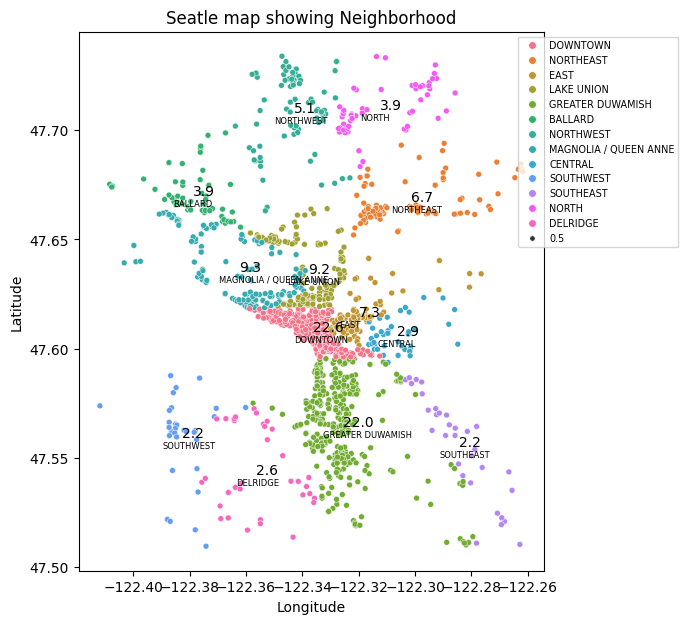

In [ ]:
# on vérifie sur une carte qu'il n'y a pas de superposition d'arrondissement

# serie des proportions de chaque arrondissement
df_prop_neigh=round(df_bis_std_enc['Neighborhood'].value_counts(normalize=True)*100,1)

# plot les neigh
plt.figure(figsize=(6,7))
sns.scatterplot(data=df_bis_std_enc,x='Longitude',y='Latitude',hue='Neighborhood', palette=sns.color_palette("husl", 13),size=0.5)
plt.legend(fontsize='x-small',markerscale=.9,loc='upper right', bbox_to_anchor=(1.3, 1))

# affiche les proportions assoc
for n in df_prop_neigh.index:
  x,y=df_bis_std_enc.loc[df_bis_std_enc['Neighborhood']==n,'Longitude'].mean(),df_bis_std_enc.loc[df_bis_std_enc['Neighborhood']==n,'Latitude'].mean()
  s=round(df_prop_neigh[n],2)
  plt.text(x=x,y=y,s=s)
  plt.text(x=x-.007,y=y-.005,s=n,fontsize=6)

plt.title('Seatle map showing Neighborhood')

In [ ]:
# on équilibre les proportion par regroupement
df_bis_std_enc.loc[(df_bis_std_enc['Neighborhood']=='NORTHEAST') | (df_bis_std_enc['Neighborhood']=='NORTHWEST'),'Neighborhood']='NORTH'
df_bis_std_enc.loc[(df_bis_std_enc['Neighborhood']=='BALLARD') | (df_bis_std_enc['Neighborhood']=='MAGNOLIA / QUEEN ANNE'),'Neighborhood']='WEST'
df_bis_std_enc.loc[(df_bis_std_enc['Neighborhood']=='LAKE UNION') | (df_bis_std_enc['Neighborhood']=='EAST'),'Neighborhood']='CENTRAL'
df_bis_std_enc.loc[(df_bis_std_enc['Neighborhood']=='SOUTHEAST') | (df_bis_std_enc['Neighborhood']=='SOUTHWEST') | (df_bis_std_enc['Neighborhood']=='DELRIDGE'),'Neighborhood']='SOUTH'

<ipython-input-98-b60431f1c025>:8: UserWarning: The palette list has more values (13) than needed (6), which may not be intended.
  sns.scatterplot(data=df_bis_std_enc,x='Longitude',y='Latitude',hue='Neighborhood', palette=sns.color_palette("husl", 13),size=0.5)


Text(0.5, 1.0, 'Seatle map showing Neighborhood')

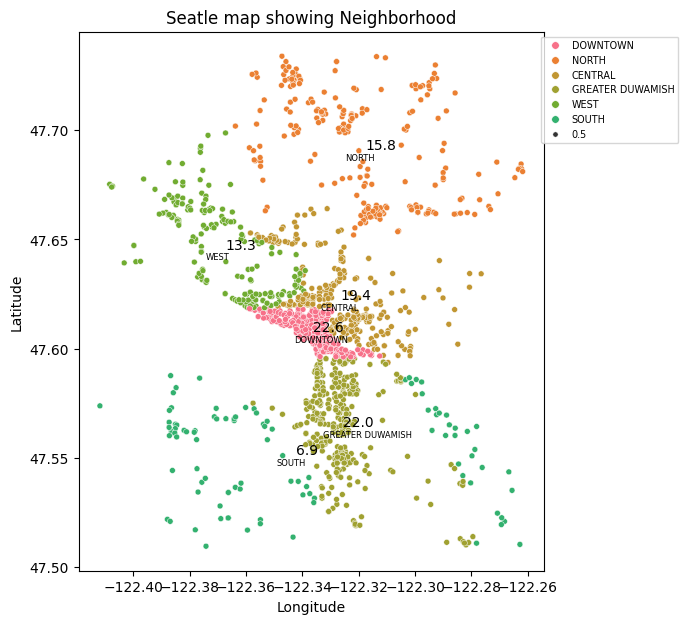

In [ ]:
# on vérifie le resultat

# serie des proportions de chaque arrondissement
df_prop_neigh=round(df_bis_std_enc['Neighborhood'].value_counts(normalize=True)*100,1)

# plot les neigh
plt.figure(figsize=(6,7))
sns.scatterplot(data=df_bis_std_enc,x='Longitude',y='Latitude',hue='Neighborhood', palette=sns.color_palette("husl", 13),size=0.5)
plt.legend(fontsize='x-small',markerscale=.9,loc='upper right', bbox_to_anchor=(1.3, 1))

# affiche les proportions assoc
for n in df_prop_neigh.index:
  x,y=df_bis_std_enc.loc[df_bis_std_enc['Neighborhood']==n,'Longitude'].mean(),df_bis_std_enc.loc[df_bis_std_enc['Neighborhood']==n,'Latitude'].mean()
  s=round(df_prop_neigh[n],2)
  plt.text(x=x,y=y,s=s)
  plt.text(x=x-.007,y=y-.005,s=n,fontsize=6)

plt.title('Seatle map showing Neighborhood')

##### Modality encoding

In [ ]:
ohe_neigh=OneHotEncoder(sparse_output=False)

D_n=ohe_neigh.fit_transform(df_bis_std_enc[['Neighborhood']])

In [ ]:
encoding_n=ohe_neigh.get_feature_names_out().tolist()

In [ ]:
encoding_n

['Neighborhood_CENTRAL',
 'Neighborhood_DOWNTOWN',
 'Neighborhood_GREATER DUWAMISH',
 'Neighborhood_NORTH',
 'Neighborhood_SOUTH',
 'Neighborhood_WEST']

In [ ]:
df_bis_std_enc[encoding_n]=D_n

In [ ]:
df_bis_std_enc=df_bis_std_enc.drop(['Neighborhood'],axis=1)

In [ ]:
def ohc_feat(dataframe, feature):
  """
  feature as list if more than one
  """
  df_ = dataframe.copy()
  ohe=OneHotEncoder(sparse_output=False)
  if df_[feature].ndim==1:
    shp=np.array(df_[feature]).reshape(-1,1)
  else:
    shp=df_[feature]
  D_n=ohe.fit_transform(shp)
  enc_col=ohe.get_feature_names_out().tolist()
  df_[enc_col]=D_n

  if df_[feature].ndim==1:
    for c in range(len(enc_col)):
      df_ = df_.rename(columns={str(enc_col[c]) : feature + '_' + str(df_[feature].unique()[c])})

  df_=df_.drop([feature],axis=1)

  return df_

Encodage terminé !

#### CouncilDistrictCode

Cette variable semble mieux répartir les propriétés sur la carte. Nous testerons les deux pour les modèles (council et neigh).

<ipython-input-105-fd949cc2ebfd>:5: UserWarning: The palette list has more values (13) than needed (7), which may not be intended.
  sns.scatterplot(data=df,x='Longitude',y='Latitude',hue='CouncilDistrictCode', palette=sns.color_palette("husl", 13),size=0.5)


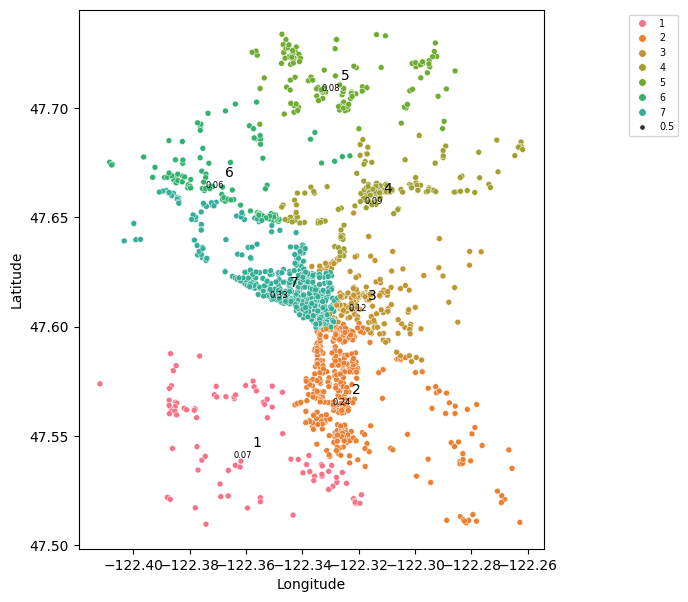

In [ ]:
DDD=df_bis_std_enc['CouncilDistrictCode'].value_counts(normalize=True)

# plot les neigh
plt.figure(figsize=(6,7))
sns.scatterplot(data=df,x='Longitude',y='Latitude',hue='CouncilDistrictCode', palette=sns.color_palette("husl", 13),size=0.5)
plt.legend(fontsize='x-small',markerscale=.9,loc='upper right', bbox_to_anchor=(1.3, 1))

# affiche les num assoc
for n in df_bis_std_enc['CouncilDistrictCode'].unique():
  x,y=df_bis_std_enc.loc[df_bis_std_enc['CouncilDistrictCode']==n,'Longitude'].mean(),df_bis_std_enc.loc[df_bis_std_enc['CouncilDistrictCode']==n,'Latitude'].mean()
  plt.text(x=x,y=y,s=n)
  plt.text(x=x-.007,y=y-.005,s=round(DDD[n],2),fontsize=6)

In [ ]:
df_bis_std_enc = ohc_feat(df_bis_std_enc, 'CouncilDistrictCode')

# Dataframe export

Le dataframe est prêt pour tester le permier modèle de la consommation des bâtiments.

Ci-dessous nous réalisons un export du dataframe afin de le retélécharger dans un second notebook dans lequel est détaillé ce modèle.

In [ ]:
from pathlib import Path
filepath = Path('/content/drive/MyDrive/FORMATION DATASCIENTIST OC - Lucas GAMBA/Projet 4/Content/df_feat.csv')
df_bis_std_enc.to_csv(filepath)